<a href="https://colab.research.google.com/github/rajlm10/D2L-Torch/blob/main/D2L_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install d2l -q

     |████████████████████████████████| 82 kB 525 kB/s 
     |████████████████████████████████| 11.2 MB 36.0 MB/s 
     |████████████████████████████████| 9.9 MB 45.2 MB/s 
     |████████████████████████████████| 61 kB 6.5 MB/s 
     |████████████████████████████████| 899 kB 48.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import torch
from d2l import torch as d2l

# Gradient Descent 

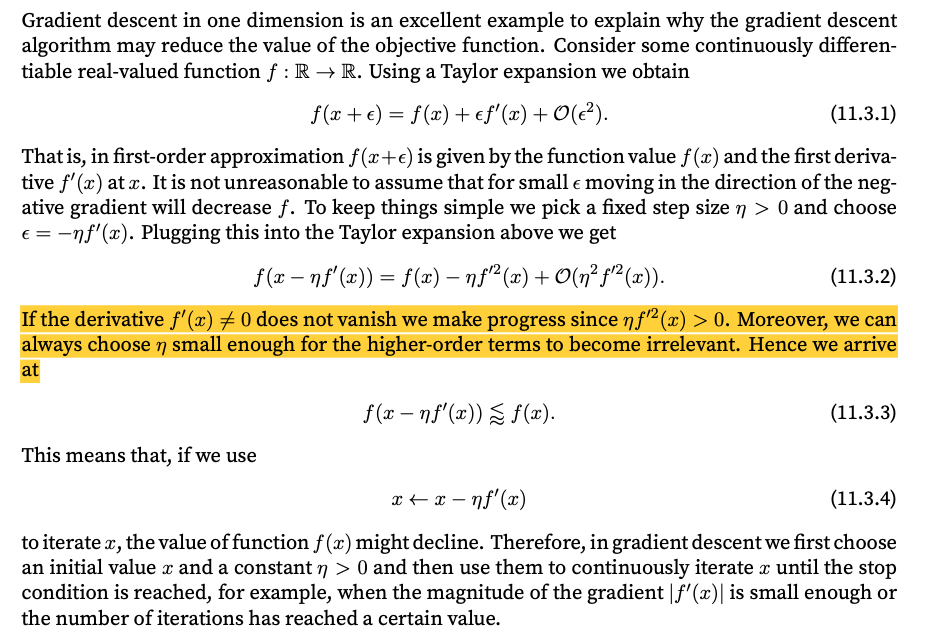

In [ ]:
def f(x):  # Objective function
    return x ** 2
def f_grad(x): # Gradient (derivative) of the objective function 
  return 2 * x

In [ ]:
def gd(eta, f_grad): 
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x)
    results.append(float(x)) 
  print(f'epoch 10, x: {x:f}') 
  return results
results = gd(0.2, f_grad)

epoch 10, x: 0.060466


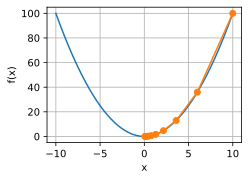

In [ ]:
def show_trace(results, f):
  n = max(abs(min(results)), abs(max(results)))
  f_line = torch.arange(-n, n, 0.01)
  d2l.set_figsize()
  d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o']) 
  
show_trace(results, f)

epoch 10, x: 3.486784


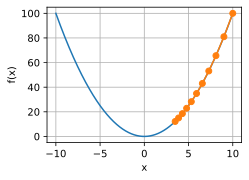

In [ ]:
show_trace(gd(0.05, f_grad), f) #Slower learning rate

epoch 10, x: -1.528166


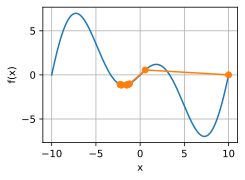

In [ ]:
c = torch.tensor(0.15 * np.pi) 
def f(x): # Objective function
  return x * torch.cos(c * x)
def f_grad(x): # Gradient of the objective function
  return torch.cos(c * x) - c * x * torch.sin(c * x) 
  
show_trace(gd(2, f_grad), f) #High learning rate overshoots

epoch 10, x: 7.295479


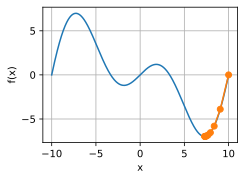

In [ ]:
c = torch.tensor(0.15 * np.pi) 
def f(x): # Objective function
  return x * torch.cos(c * x)
def f_grad(x): # Gradient of the objective function
  return torch.cos(c * x) - c * x * torch.sin(c * x) 
  
show_trace(gd(0.2, f_grad), f) 

## Multivariate GD

In [ ]:
def train_2d(trainer, steps=20, f_grad=None):
  """Optimize a 2D objective function with a customized trainer."""
  x1, x2 = -5, -2
  results = [(x1, x2)]
  for i in range(steps):
    if f_grad:
      x1, x2 = trainer(x1, x2, f_grad)
    else:
      x1, x2= trainer(x1, x2)
    results.append((x1, x2))
  print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}') 
  return results

def show_trace_2d(f, results):
  """Show the trace of 2D variables during optimization.""" 
  d2l.set_figsize()
  d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
  x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
  torch.arange(-3.0, 1.0, 0.1)) 
  d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
  d2l.plt.xlabel('x1') 
  d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


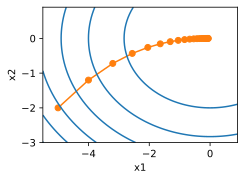

In [ ]:
def f_2d(x1, x2): # Objective function 
  return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2): # Gradient of the objective function 
  return (2 * x1, 4 * x2)

def gd_2d(x1, x2,f_grad):
  g1, g2 = f_grad(x1, x2)
  return (x1 - eta * g1, x2 - eta * g2)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

## Newton's method
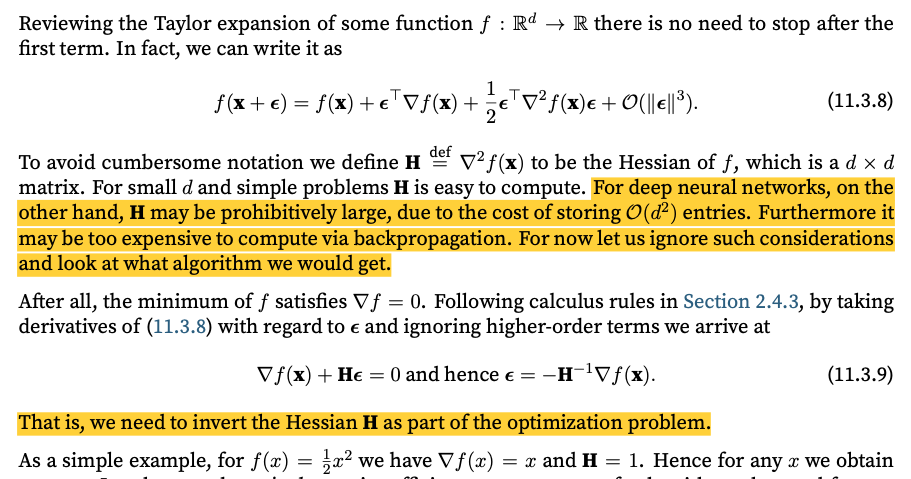

epoch 10, x: tensor(0.)


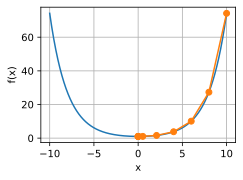

In [ ]:
c = torch.tensor(0.5)
def f(x): # Objective function
  return torch.cosh(c * x)

def f_grad(x): # Gradient of the objective function
  return c * torch.sinh(c * x)

def f_hess(x): # Hessian of the objective function
  return c**2 * torch.cosh(c * x)

def newton(eta=1): 
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x) / f_hess(x)
    results.append(float(x)) 
  print('epoch 10, x:', x) 
  return results

show_trace(newton(), f) #No learning rate specified

Now let us consider a nonconvex function, such as f(x) = x cos(cx) for some constant c. After all, note that in Newtonʼs method we end up dividing by the Hessian. This means that if the second derivative is negative we may walk into the direction of increasing the value of f . That is a fatal flaw of the algorithm. Let us see what happens in practice.

epoch 10, x: tensor(-31.5426)


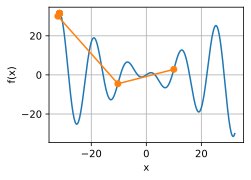

In [ ]:
# We overshoot because the hessian is negative here at some x
def f(x): # Objective function 
  return x * torch.cos(c * x)

def f_grad(x): # Gradient of the objective function 
  return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x): # Hessian of the objective function
  return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

## Solving the problem

1) Using the absolute of the Hessian

2) Defining a learning rate (GD won't be as sensitive to it as in regular GD)

epoch 10, x: tensor(-37.8048)


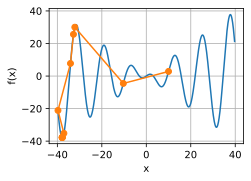

In [ ]:
def newton_abs_hessian(eta=1): 
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x) / torch.abs(f_hess(x))
    results.append(float(x)) 
  print('epoch 10, x:', x) 
  return results
show_trace(newton_abs_hessian(), f)

epoch 10, x: tensor(6.8386)


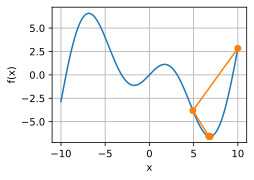

In [ ]:
show_trace(newton(0.25), f)

# Stochastic Gradient Descent

If gradient descent is used, the computational cost for each independent variable iteration is O(n), which grows linearly with n. Therefore, when the training dataset is larger, the cost of gradient descent for each iteration will be higher.

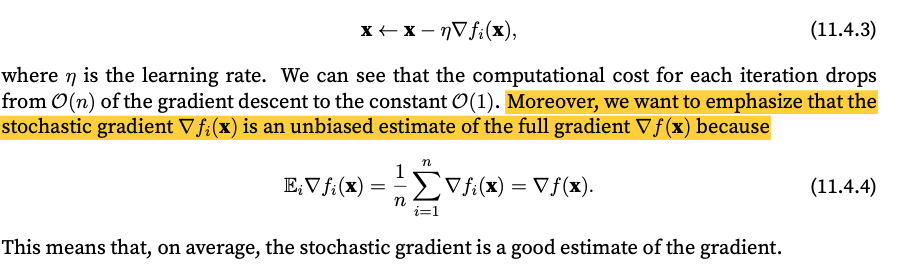

In [ ]:
def f(x1, x2):  # Objective function
  return x1 ** 2 + 2 * x2 ** 2
def f_grad(x1, x2): # Gradient of the objective function 
  return 2 * x1, 4 * x2

In [ ]:
def sgd(x1, x2, s1, s2, f_grad):
  g1, g2 = f_grad(x1, x2)
  # Simulate noisy gradient
  g1 += torch.normal(0.0, 1, (1,)) 
  g2 += torch.normal(0.0, 1, (1,)) 
  eta_t = eta * lr()
  return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

epoch 50, x1: 0.037367, x2: 0.185607


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


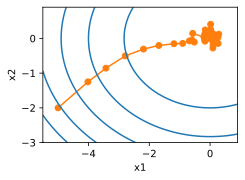

In [ ]:
def constant_lr(): 
  return 1
eta = 0.1
lr = constant_lr # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

As we can see, the trajectory of the variables in the stochastic gradient descent is much more noisy than the one we observed in gradient descent in Section 11.3. This is due to the stochastic nature of the gradient. That is, even when we arrive near the minimum, we are still subject to the uncertainty injected by the instantaneous gradient via η∇fi(x). Even after 50 steps the quality is still not so good. Even worse, it will not improve after additional steps (we encourage you to experiment with a larger number of steps to confirm this). This leaves us with the only alternative: change the learning rate η. However, if we pick this too small, we will not make any meaningful progress initially. On the other hand, if we pick it too large, we will not get a good solution, as seen above. The only way to resolve these conflicting goals is to reduce the learning rate dynamically as optimization progresses.

## Dynamic Learning Rate

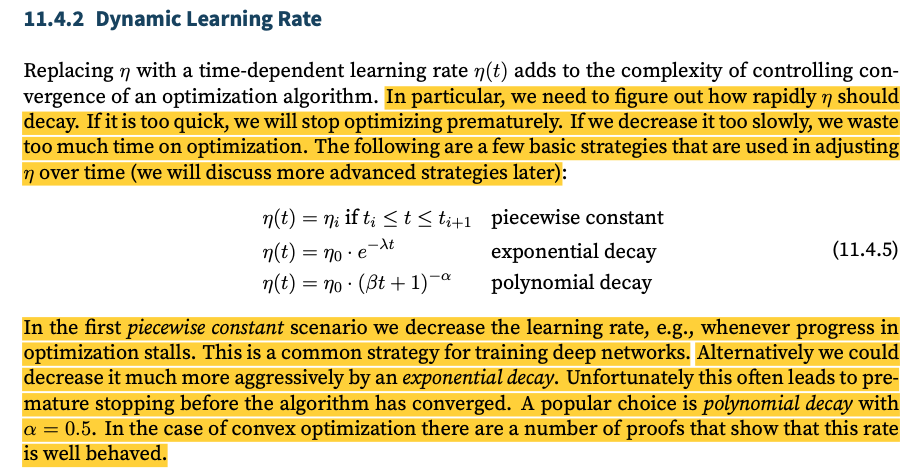

epoch 1000, x1: -0.784042, x2: -0.040981


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


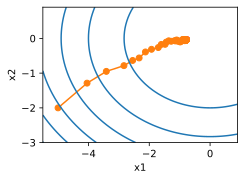

In [ ]:
import math
def exponential_lr():
# Global variable that is defined outside this function and updated inside 
  global t
  t += 1
  return math.exp(-0.1 * t)

t=1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

As expected, the variance in the parameters is significantly reduced. However, this comes at the expense of failing to converge to the optimal solution x = (0, 0). Even after 1000 iteration steps are we are still very far away from the optimal solution. Indeed, the algorithm fails to converge at all. On the other hand, if we use a polynomial decay where the learning rate decays with the inverse square root of the number of steps, convergence gets better after only 50 steps.

epoch 50, x1: -0.096231, x2: -0.144659


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


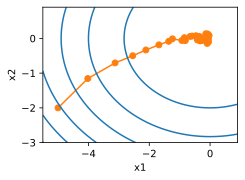

In [ ]:
def polynomial_lr():
  # Global variable that is defined outside this function and updated inside 
  global t
  t += 1
  return (1 + 0.1 * t) ** (-0.5)
t=1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

# Mini-batch SGD 

In [ ]:
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat', '76e5be1548fd8222e5074cf0faae75edff8cf93f')
def get_data_ch11(batch_size=10, n=1500):
  data = np.genfromtxt(d2l.download('airfoil'),
  dtype=np.float32, delimiter='\t')
  data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
  data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]), batch_size, is_train=True)
  return data_iter, data.shape[1]-1

In [ ]:
def sgd(params, states, hyperparams):
    for p in params:
      p.data.sub_(hyperparams['lr'] * p.grad) 
      p.grad.data.zero_()

In [ ]:
def train(trainer_fn, states, hyperparams, data_iter, feature_dim, num_epochs=2):
  #Initialization
  w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1), requires_grad=True)
  b = torch.zeros((1), requires_grad=True)
  net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
  n, timer = 0, d2l.Timer()
  animator = d2l.Animator(xlabel='epoch', ylabel='loss',xlim=[0, num_epochs], ylim=[0.22, 0.35])

  for _ in range(num_epochs):
    for X, y in data_iter:
      l = loss(net(X), y).mean()
      l.backward()
      trainer_fn([w, b], states, hyperparams) 
      n += X.shape[0]
      if n % 200 == 0: 
        timer.stop()
        animator.add(n/X.shape[0]/len(data_iter), (d2l.evaluate_loss(net, data_iter, loss),))
        timer.start()
  print(f'loss: {animator.Y[0][-1]:.3f}, {timer.avg():.3f} sec/epoch') 
  return timer.cumsum()

loss: 0.245, 0.058 sec/epoch


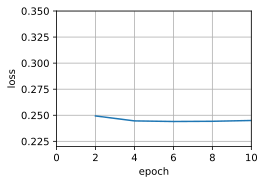

In [ ]:
def train_sgd(lr, batch_size, num_epochs=2): 
  data_iter, feature_dim = get_data_ch11(batch_size) 
  return train(trainer_fn=sgd, states=None, hyperparams={'lr': lr}, data_iter=data_iter, feature_dim=feature_dim, num_epochs=num_epochs) 

gd_res = train_sgd(1, 1500, 10)

loss: 0.243, 0.062 sec/epoch


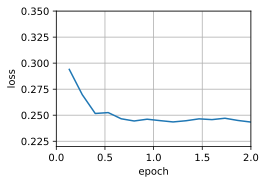

In [ ]:
sgd_res = train_sgd(0.005, 1)

loss: 0.250, 0.005 sec/epoch


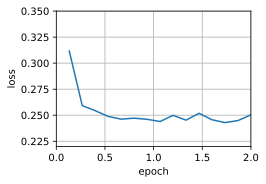

In [ ]:
mini1_res = train_sgd(.4, 100)

loss: 0.243, 0.013 sec/epoch


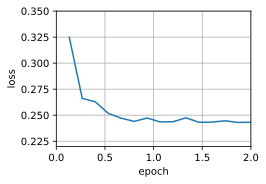

In [ ]:
mini2_res = train_sgd(.05, 10)

In [ ]:
import torch
from torch import nn

In [ ]:
def train_concise(trainer_fn, hyperparams, data_iter, num_epochs=4):
  # Initialization
  net = nn.Sequential(nn.Linear(5, 1)) 
  def init_weights(m):
    if type(m) == nn.Linear: 
      torch.nn.init.normal_(m.weight, std=0.01)
  net.apply(init_weights)
  optimizer = trainer_fn(net.parameters(), **hyperparams) 
  loss = nn.MSELoss(reduction='none')
  animator = d2l.Animator(xlabel='epoch', ylabel='loss',xlim=[0, num_epochs], ylim=[0.22, 0.35]) 
  n, timer = 0, d2l.Timer()
  for _ in range(num_epochs): 
    for X, y in data_iter:
      optimizer.zero_grad() 
      out = net(X)
      y = y.reshape(out.shape) 
      l = loss(out, y) 
      l.mean().backward() 
      optimizer.step()
      n += X.shape[0]
      if n % 200 == 0:
        timer.stop()
        # `MSELoss` computes squared error without the 1/2 factor 
        animator.add(n/X.shape[0]/len(data_iter),(d2l.evaluate_loss(net, data_iter, loss) / 2,)) 
        timer.start()
  print(f'loss: {animator.Y[0][-1]:.3f}, {timer.avg():.3f} sec/epoch')

loss: 0.242, 0.017 sec/epoch


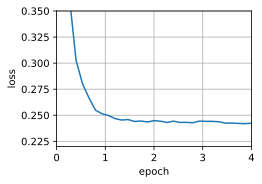

In [ ]:
data_iter, _ = get_data_ch11(10)
trainer = torch.optim.SGD 
train_concise(trainer, {'lr': 0.01}, data_iter)

# Momentum

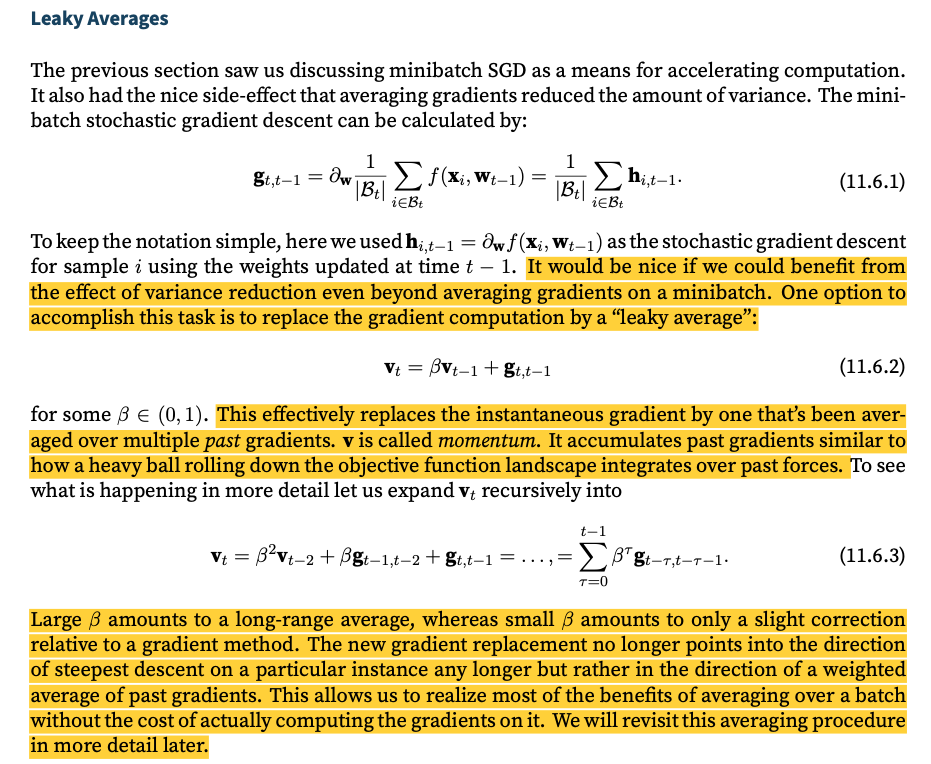
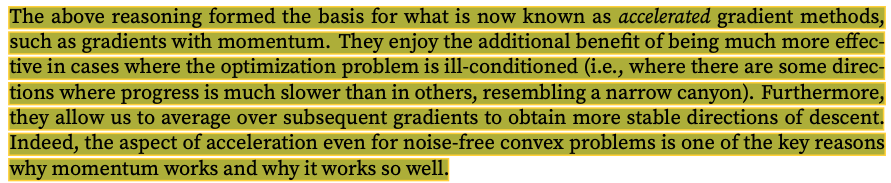

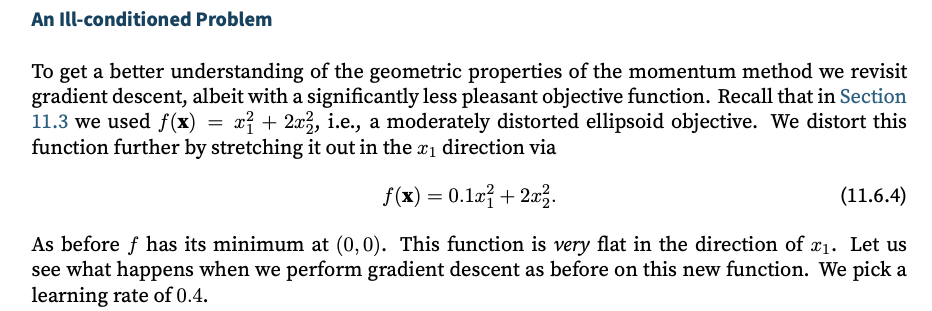

In [ ]:
def train_2d(trainer, steps=20, f_grad=None): 
  """Optimize a 2D objective function with a customized trainer."""
  # `s1` and `s2` are internal state variables that will be used later 
  x1, x2, s1, s2 = -5, -2, 0, 0
  results = [(x1, x2)]
  for i in range(steps):
    if f_grad:
      x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
    else:
      x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
    results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}') 
  return results

epoch 1, x1: -4.600000, x2: 1.200000
epoch 2, x1: -4.232000, x2: -0.720000
epoch 3, x1: -3.893440, x2: 0.432000
epoch 4, x1: -3.581965, x2: -0.259200
epoch 5, x1: -3.295408, x2: 0.155520
epoch 6, x1: -3.031775, x2: -0.093312
epoch 7, x1: -2.789233, x2: 0.055987
epoch 8, x1: -2.566094, x2: -0.033592
epoch 9, x1: -2.360807, x2: 0.020155
epoch 10, x1: -2.171942, x2: -0.012093
epoch 11, x1: -1.998187, x2: 0.007256
epoch 12, x1: -1.838332, x2: -0.004354
epoch 13, x1: -1.691265, x2: 0.002612
epoch 14, x1: -1.555964, x2: -0.001567
epoch 15, x1: -1.431487, x2: 0.000940
epoch 16, x1: -1.316968, x2: -0.000564
epoch 17, x1: -1.211611, x2: 0.000339
epoch 18, x1: -1.114682, x2: -0.000203
epoch 19, x1: -1.025507, x2: 0.000122
epoch 20, x1: -0.943467, x2: -0.000073


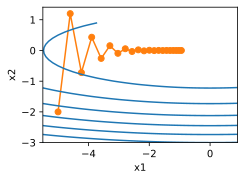

In [ ]:
import torch
from d2l import torch as d2l
eta = 0.4
def f_2d(x1, x2):
  return 0.1 * x1 ** 2 + 2 * x2 ** 2 
def gd_2d(x1, x2, s1, s2):
  return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0) 

d2l.show_trace_2d(f_2d, train_2d(gd_2d))

By construction, the gradient in the x2 direction is much higher and changes much more rapidly than in the horizontal x1 direction. Thus we are stuck between two undesirable choices: if we pick a small learning rate we ensure that the solution does not diverge in the x2 direction but we are saddled with slow convergence in the x1 direction. Conversely, with a large learning rate we progress rapidly in the x1 direction but diverge in x2. The example below illustrates what hap- pens even after a slight increase in learning rate from 0.4 to 0.6. Convergence in the x1 direction improves but the overall solution quality is much worse.

epoch 1, x1: -4.400000, x2: 2.800000
epoch 2, x1: -3.872000, x2: -3.920000
epoch 3, x1: -3.407360, x2: 5.488000
epoch 4, x1: -2.998477, x2: -7.683200
epoch 5, x1: -2.638660, x2: 10.756480
epoch 6, x1: -2.322020, x2: -15.059072
epoch 7, x1: -2.043378, x2: 21.082701
epoch 8, x1: -1.798173, x2: -29.515781
epoch 9, x1: -1.582392, x2: 41.322094
epoch 10, x1: -1.392505, x2: -57.850931
epoch 11, x1: -1.225404, x2: 80.991303
epoch 12, x1: -1.078356, x2: -113.387825
epoch 13, x1: -0.948953, x2: 158.742955
epoch 14, x1: -0.835079, x2: -222.240137
epoch 15, x1: -0.734869, x2: 311.136191
epoch 16, x1: -0.646685, x2: -435.590668
epoch 17, x1: -0.569083, x2: 609.826935
epoch 18, x1: -0.500793, x2: -853.757708
epoch 19, x1: -0.440698, x2: 1195.260792
epoch 20, x1: -0.387814, x2: -1673.365109


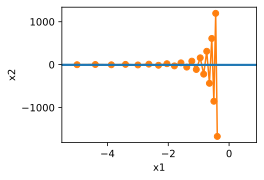

In [ ]:
eta = 0.6
d2l.show_trace_2d(f_2d,train_2d(gd_2d))

epoch 1, x1: -4.400000, x2: 2.800000
epoch 2, x1: -3.572000, x2: -1.520000
epoch 3, x1: -2.729360, x2: -0.032000
epoch 4, x1: -1.980517, x2: 0.788800
epoch 5, x1: -1.368433, x2: -0.693920
epoch 6, x1: -0.898179, x2: 0.230128
epoch 7, x1: -0.555271, x2: 0.139845
epoch 8, x1: -0.317184, x2: -0.240924
epoch 9, x1: -0.160079, x2: 0.146909
epoch 10, x1: -0.062317, x2: -0.011756
epoch 11, x1: -0.005957, x2: -0.062874
epoch 12, x1: 0.022937, x2: 0.062465
epoch 13, x1: 0.034632, x2: -0.024781
epoch 14, x1: 0.036323, x2: -0.008929
epoch 15, x1: 0.032810, x2: 0.020427
epoch 16, x1: 0.027117, x2: -0.013920
epoch 17, x1: 0.021016, x2: 0.002314
epoch 18, x1: 0.015443, x2: 0.004877
epoch 19, x1: 0.010804, x2: -0.005546
epoch 20, x1: 0.007188, x2: 0.002553


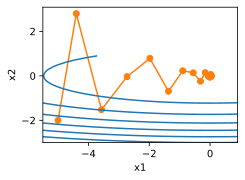

In [ ]:
def momentum_2d(x1, x2, v1, v2):
  v1 = beta * v1 + 0.2 * x1
  v2 = beta * v2 + 4 * x2
  return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
d2l.show_trace_2d(f_2d, train_2d(momentum_2d))

Let us see what happens when we decrease the momentum parameter. Halving it to β = 0.25 leads to a trajectory that barely converges at all. Nonetheless, it is a lot better than without momentum (when the solution diverges).

epoch 1, x1: -4.400000, x2: 2.800000
epoch 2, x1: -3.722000, x2: -2.720000
epoch 3, x1: -3.105860, x2: 2.428000
epoch 4, x1: -2.579122, x2: -2.112200
epoch 5, x1: -2.137943, x2: 1.822030
epoch 6, x1: -1.771095, x2: -1.567284
epoch 7, x1: -1.466851, x2: 1.346870
epoch 8, x1: -1.214768, x2: -1.157079
epoch 9, x1: -1.005975, x2: 0.993923
epoch 10, x1: -0.833060, x2: -0.853742
epoch 11, x1: -0.689864, x2: 0.733323
epoch 12, x1: -0.571281, x2: -0.629886
epoch 13, x1: -0.473082, x2: 0.541038
epoch 14, x1: -0.391762, x2: -0.464722
epoch 15, x1: -0.324421, x2: 0.399171
epoch 16, x1: -0.268655, x2: -0.342866
epoch 17, x1: -0.222475, x2: 0.294503
epoch 18, x1: -0.184233, x2: -0.252962
epoch 19, x1: -0.152564, x2: 0.217281
epoch 20, x1: -0.126340, x2: -0.186632


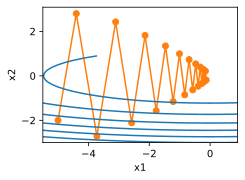

In [ ]:
eta, beta = 0.6, 0.25
d2l.show_trace_2d(f_2d, train_2d(momentum_2d))

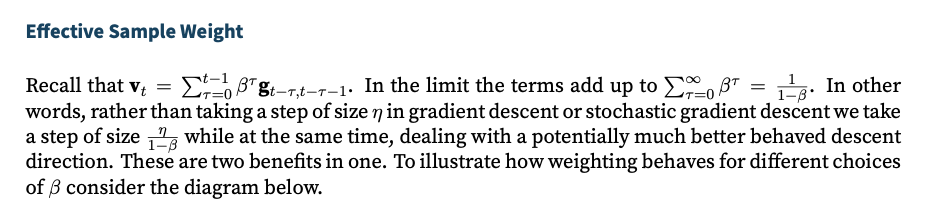

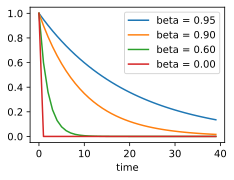

In [ ]:
d2l.set_figsize()
betas = [0.95, 0.9, 0.6, 0] 
for beta in betas:
  x = torch.arange(40).detach().numpy()
  d2l.plt.plot(x, beta ** x, label=f'beta = {beta:.2f}') 
d2l.plt.xlabel('time')
d2l.plt.legend();

loss: 0.247, 0.020 sec/epoch


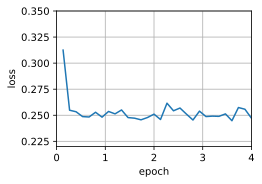

In [ ]:
trainer = torch.optim.SGD
train_concise(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter) #Note how we pass momentum

# Adagrad 

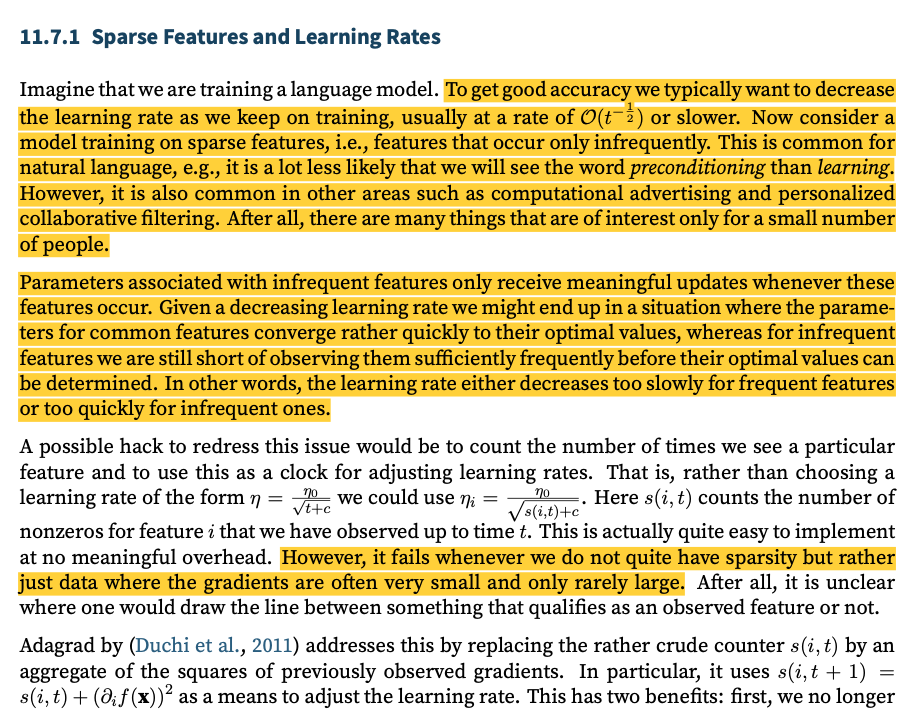

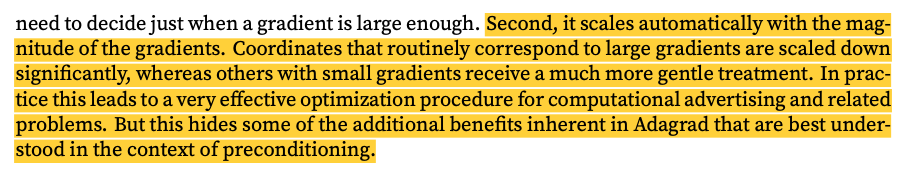

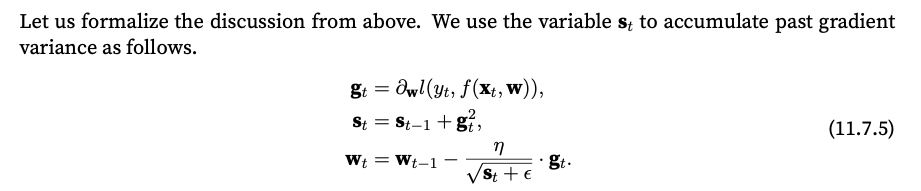

We are going to implement Adagrad using the same learning rate previously, i.e., η = 0.4. As we can see, the iterative trajectory of the independent variable is smoother. However, due to the cumulative effect of st, the learning rate continuously decays, so the independent variable does not move as much during later stages of iteration.

epoch 1, x1: -4.600000, x2: -1.600000
epoch 2, x1: -4.329178, x2: -1.350122
epoch 3, x1: -4.114228, x2: -1.163597
epoch 4, x1: -3.932302, x2: -1.014436
epoch 5, x1: -3.772835, x2: -0.890767
epoch 6, x1: -3.629933, x2: -0.785968
epoch 7, x1: -3.499909, x2: -0.695875
epoch 8, x1: -3.380281, x2: -0.617648
epoch 9, x1: -3.269280, x2: -0.549239
epoch 10, x1: -3.165593, x2: -0.489098
epoch 11, x1: -3.068216, x2: -0.436016
epoch 12, x1: -2.976356, x2: -0.389023
epoch 13, x1: -2.889378, x2: -0.347323
epoch 14, x1: -2.806763, x2: -0.310253
epoch 15, x1: -2.728078, x2: -0.277253
epoch 16, x1: -2.652960, x2: -0.247842
epoch 17, x1: -2.581099, x2: -0.221608
epoch 18, x1: -2.512228, x2: -0.198191
epoch 19, x1: -2.446117, x2: -0.177277
epoch 20, x1: -2.382563, x2: -0.158591


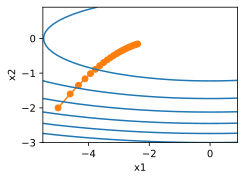

In [ ]:
def adagrad_2d(x1, x2, s1, s2): 
  eps = 1e-6
  g1, g2 = 0.2 * x1, 4 * x2 #gradient of 0.1 x1**2 + 2 x2**2
  s1 += g1 ** 2
  s2 += g2 ** 2
  x1 -= eta / math.sqrt(s1 + eps) * g1 
  x2 -= eta / math.sqrt(s2 + eps) * g2 
  return x1, x2, s1, s2

def f_2d(x1, x2):
  return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, train_2d(adagrad_2d))

As we increase the learning rate to 2 we see much better behavior. This already indicates that the decrease in learning rate might be rather aggressive, even in the noise-free case and we need to ensure that parameters converge appropriately.

epoch 1, x1: -3.000001, x2: -0.000000
epoch 2, x1: -1.971010, x2: -0.000000
epoch 3, x1: -1.330559, x2: -0.000000
epoch 4, x1: -0.907975, x2: -0.000000
epoch 5, x1: -0.622554, x2: -0.000000
epoch 6, x1: -0.427785, x2: -0.000000
epoch 7, x1: -0.294250, x2: -0.000000
epoch 8, x1: -0.202494, x2: -0.000000
epoch 9, x1: -0.139383, x2: -0.000000
epoch 10, x1: -0.095951, x2: -0.000000
epoch 11, x1: -0.066056, x2: -0.000000
epoch 12, x1: -0.045477, x2: -0.000000
epoch 13, x1: -0.031309, x2: -0.000000
epoch 14, x1: -0.021555, x2: -0.000000
epoch 15, x1: -0.014840, x2: -0.000000
epoch 16, x1: -0.010217, x2: -0.000000
epoch 17, x1: -0.007034, x2: -0.000000
epoch 18, x1: -0.004843, x2: -0.000000
epoch 19, x1: -0.003334, x2: -0.000000
epoch 20, x1: -0.002295, x2: -0.000000


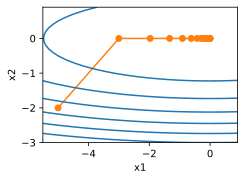

In [ ]:
eta = 2
d2l.show_trace_2d(f_2d, train_2d(adagrad_2d))

We use a larger learning rate to train the model compared to torch.optim.SGD with momentum for the same data

loss: 0.243, 0.016 sec/epoch


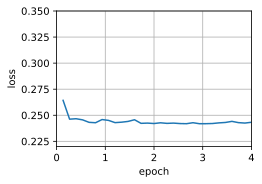

In [ ]:
trainer = torch.optim.Adagrad 
train_concise(trainer, {'lr': 0.1}, data_iter)

##Summary



• Adagrad decreases the learning rate dynamically on a per-coordinate basis.

• It uses the magnitude of the gradient as a means of adjusting how quickly progress is achieved - coordinates with large gradients are compensated with a smaller learning rate.

•Computing the exact second derivative is typically infeasible in deep learning problems due to memory and computational constraints. The gradient can be a useful proxy.

• If the optimization problem has a rather uneven structure Adagrad can help mitigate the distortion.

• Adagrad is particularly effective for sparse features where the learning rate needs to decrease more slowly for infrequently occurring terms.

• On deep learning problems Adagrad can sometimes be too aggressive in reducing learning rates. 



# RMSProp 

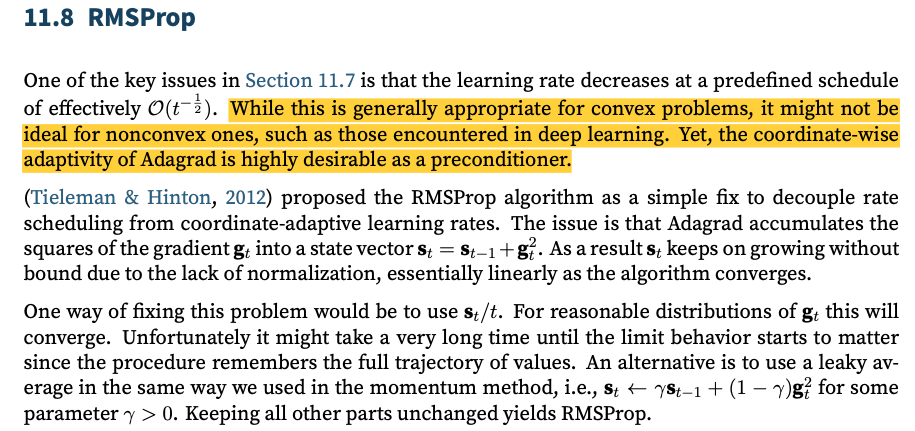

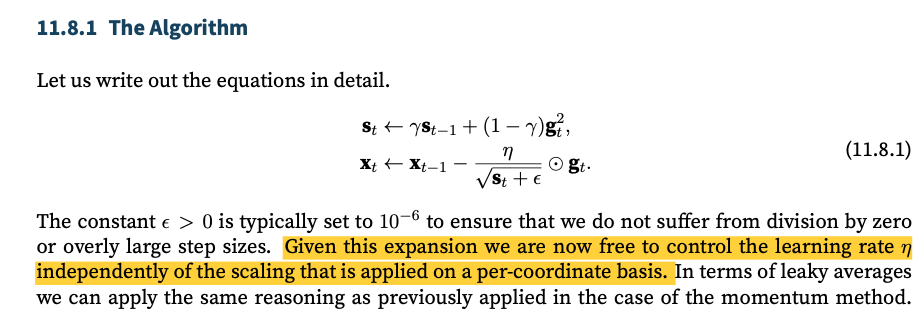

As before we use the quadratic function f (x) = 0.1x21 + 2x2 to observe the trajectory of RMSProp. Recall that in Section Adagrad, when we used Adagrad with a learning rate of 0.4, the variables moved only very slowly in the later stages of the algorithm since the learning rate decreased too quickly. Since η is controlled separately this does not happen with RMSProp.

epoch 1, x1: -3.735095, x2: -0.735089
epoch 2, x1: -2.952557, x2: -0.278126
epoch 3, x1: -2.372981, x2: -0.097741
epoch 4, x1: -1.915252, x2: -0.031013
epoch 5, x1: -1.543071, x2: -0.008699
epoch 6, x1: -1.236422, x2: -0.002101
epoch 7, x1: -0.982686, x2: -0.000421
epoch 8, x1: -0.773052, x2: -0.000066
epoch 9, x1: -0.600837, x2: -0.000007
epoch 10, x1: -0.460616, x2: -0.000000
epoch 11, x1: -0.347757, x2: -0.000000
epoch 12, x1: -0.258167, x2: 0.000000
epoch 13, x1: -0.188167, x2: -0.000000
epoch 14, x1: -0.134436, x2: 0.000000
epoch 15, x1: -0.093992, x2: -0.000000
epoch 16, x1: -0.064194, x2: 0.000000
epoch 17, x1: -0.042745, x2: -0.000000
epoch 18, x1: -0.027691, x2: 0.000000
epoch 19, x1: -0.017412, x2: -0.000000
epoch 20, x1: -0.010599, x2: 0.000000


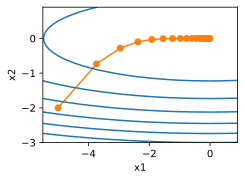

In [ ]:
def rmsprop_2d(x1, x2, s1, s2):
  g1, g2 = 0.2 * x1, 4 * x2, 
  eps=1e-6
  s1 = gamma * s1 + (1 - gamma) * g1 ** 2 
  s2 = gamma * s2 + (1 - gamma) * g2 ** 2 
  x1 -= eta / math.sqrt(s1 + eps) * g1
  x2 -= eta / math.sqrt(s2 + eps) * g2 
  return x1, x2, s1, s2

def f_2d(x1, x2):
  return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d,train_2d(rmsprop_2d))

We set the initial learning rate to 0.01 and the weighting term γ to 0.9. That is, s aggregates on average over the past 1/(1 − γ) = 10 observations of the square gradient.

loss: 0.243, 0.015 sec/epoch


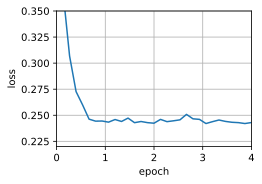

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)

trainer = torch.optim.RMSprop 
train_concise(trainer, {'lr': 0.01, 'alpha': 0.9},data_iter)

# Adadelta

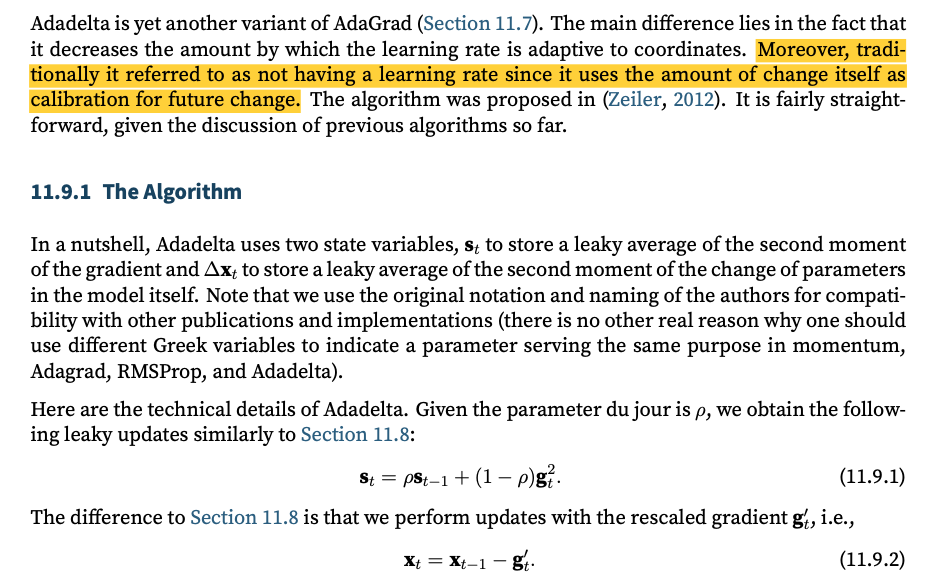

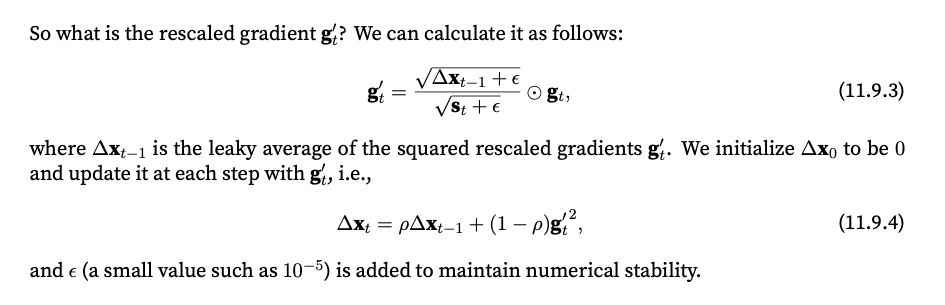

Choosing ρ = 0.9 amounts to a half-life time of 10 for each parameter update. **This tends to work quite well.** We get the following behavior.

loss: 0.242, 0.016 sec/epoch


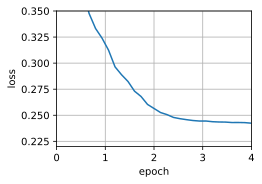

In [ ]:
trainer = torch.optim.Adadelta 
train_concise(trainer, {'rho': 0.9}, data_iter)

# Adam 

• We saw that SGD is more effective than Gradient Descent when solving optimization problems, e.g., due to its inherent resilience to redundant data.

• We saw that Mini-batch SGD  affords significant additional efficiency arising from vectorization, using larger sets of observations in one minibatch. This is the key to efficient multi-machine, multi-GPU and overall parallel processing.

• Section Momentum added a mechanism for aggregating a history of past gradients to accelerate convergence.

• Section Adagrad used per-coordinate scaling to allow for a computationally efficient preconditioner.

• Section RMSProp decoupled per-coordinate scaling from a learning rate adjustment.


Adam (Kingma & Ba, 2014) combines all these techniques into one efficient learning algorithm. As expected, this is an algorithm that has become rather popular as one of the more robust and effective optimization algorithms to use in deep learning. It is not without issues, though.

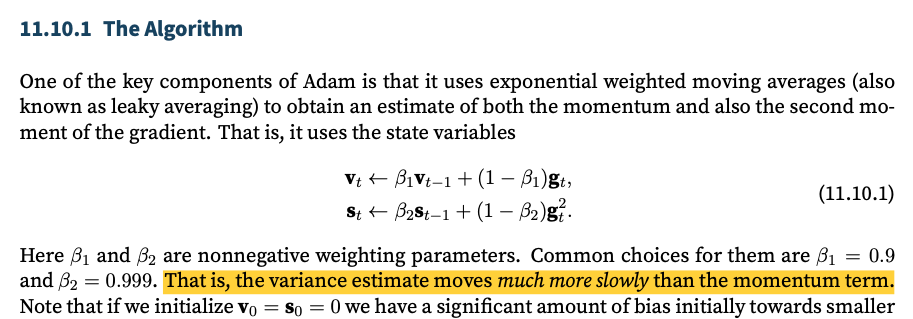

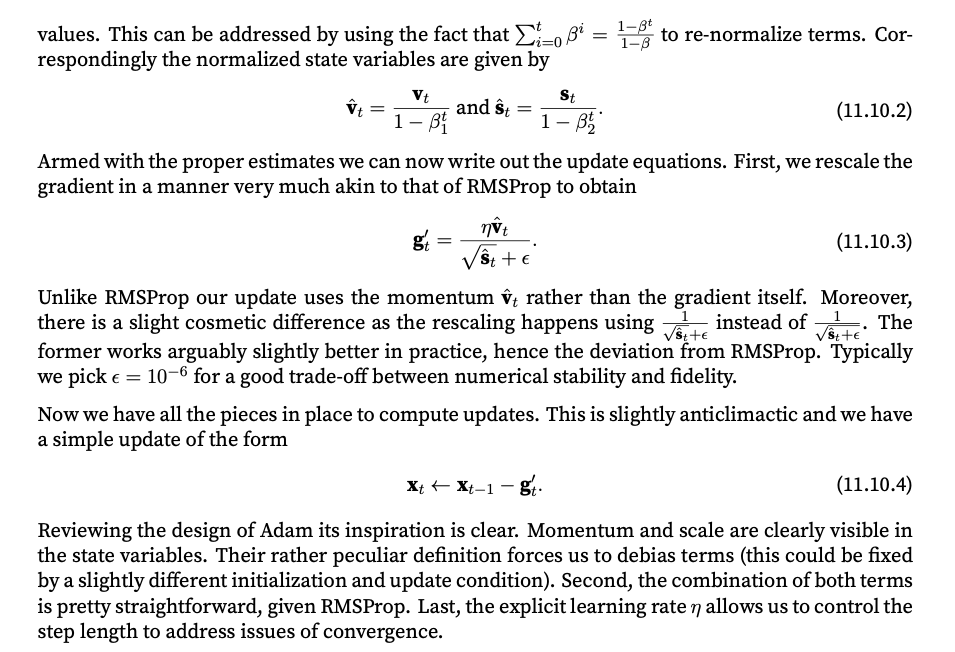

loss: 0.244, 0.016 sec/epoch


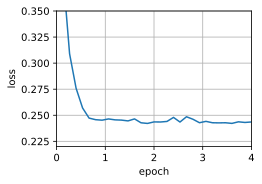

In [ ]:
trainer = torch.optim.Adam
train_concise(trainer, {'lr': 0.01}, data_iter)

# Yogi

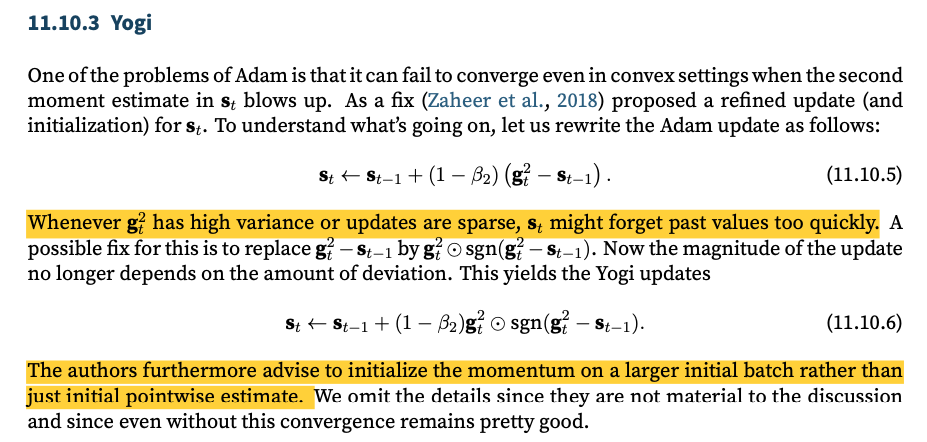

In [43]:
def init_adam_states(feature_dim):
  v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1) 
  s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1) 
  return ((v_w, s_w), (v_b, s_b))

loss: 0.243, 0.020 sec/epoch


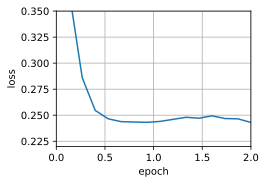

In [45]:
def yogi(params, states, hyperparams): 
  beta1, beta2, eps = 0.9, 0.999, 1e-3 
  for p, (v, s) in zip(params, states):
    with torch.no_grad():
      v[:] = beta1 * v + (1 - beta1) * p.grad 
      s[:] = s + (1 - beta2) * torch.sign(torch.square(p.grad) - s) * torch.square(p.grad)
      v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
      s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
      p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)+ eps)
      p.grad.data.zero_() 
      hyperparams['t'] += 1

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10) 

train(yogi, init_adam_states(feature_dim),{'lr': 0.01, 't': 1}, data_iter, feature_dim);

# Learning Rate Scheduling